# Esports Data Analysis
#### Author: Kelvin García Muñiz
***


In [221]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import seaborn as sns

In [222]:
df = pd.read_csv("gamesData.csv")
display(df)

,Unnamed: 0,Game,Prize,NumPlayer,NumTournaments,Year
0,0,Counter-Strike,"$400,994.88",351 Players,14 Tournaments,2002
1,1,StarCraft: Brood War,"$132,944.26",36 Players,10 Tournaments,2002
2,2,Quake III Arena,"$102,206.40",24 Players,4 Tournaments,2002
3,3,Age of Empires II,"$92,866.00",37 Players,28 Tournaments,2002
4,4,WarCraft III,"$74,740.65",35 Players,6 Tournaments,2002
...,...,...,...,...,...,...
1659,173,Power Instinct: Matrimelee,$40.00,3 Players,1 Tournament,2021
1660,174,Samurai Shodown III,$40.00,3 Players,1 Tournament,2021
1661,175,The Last Blade 2,$40.00,3 Players,1 Tournament,2021
1662,176,Shrek SuperSlam,$30.00,3 Players,1 Tournament,2021


Column one does not provide valuable information so we can drop it. 

__Note:__ We can alter the file directly since this is already a copy of the original. 

In [223]:
df = df.drop(columns=["Unnamed: 0"])
display(df)

,Game,Prize,NumPlayer,NumTournaments,Year
0,Counter-Strike,"$400,994.88",351 Players,14 Tournaments,2002
1,StarCraft: Brood War,"$132,944.26",36 Players,10 Tournaments,2002
2,Quake III Arena,"$102,206.40",24 Players,4 Tournaments,2002
3,Age of Empires II,"$92,866.00",37 Players,28 Tournaments,2002
4,WarCraft III,"$74,740.65",35 Players,6 Tournaments,2002
...,...,...,...,...,...
1659,Power Instinct: Matrimelee,$40.00,3 Players,1 Tournament,2021
1660,Samurai Shodown III,$40.00,3 Players,1 Tournament,2021
1661,The Last Blade 2,$40.00,3 Players,1 Tournament,2021
1662,Shrek SuperSlam,$30.00,3 Players,1 Tournament,2021


Check the columns for missing values

In [224]:
df.info()
df.isnull().sum() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Game            1664 non-null   object
 1   Prize           1664 non-null   object
 2   NumPlayer       1664 non-null   object
 3   NumTournaments  1664 non-null   object
 4   Year            1664 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 65.1+ KB


Game              0
Prize             0
NumPlayer         0
NumTournaments    0
Year              0
dtype: int64

We want our _prizes_ to be float numbers in order to use them in our calculations, our _years_ as strings, and our number of _players_ and _tournaments_ as integers.

While doing so we will make sure to remove unneeded strings. 

In [225]:
df["Prize"] = df["Prize"].replace('[\$,]', '', regex=True).astype(float)
pd.options.display.float_format = '{:.2f}'.format
df["NumPlayer"] = df["NumPlayer"].replace('[a-zA-z]', '', regex=True).astype(int)
df["NumTournaments"] = df["NumTournaments"].replace('[a-zA-z]', '', regex=True).astype(int)
df["Year"] = df["Year"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1664 entries, 0 to 1663
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game            1664 non-null   object 
 1   Prize           1664 non-null   float64
 2   NumPlayer       1664 non-null   int32  
 3   NumTournaments  1664 non-null   int32  
 4   Year            1664 non-null   object 
dtypes: float64(1), int32(2), object(2)
memory usage: 52.1+ KB


To study our data fully for games we will create 5 different dataframes while converting our dataframe from long to wide:
> 1. Game Prizes by Year
> 2. Game Players by Year (Professional Esports Players)
> 3. Game Tournaments by Year

As it is expected, since not all games joined the esports scene at the same time, some of them will have null values. 

We will still keep our original df for future use.

In [226]:
prizes_df = df.pivot(index="Game", columns="Year", values="Prize")
players_df = df.pivot(index="Game", columns="Year", values="NumPlayer")
tour_df = df.pivot(index="Game", columns="Year", values="NumTournaments")

We will setup a base restriction to our database based on the prize pool of the game for their tournaments. Games with a total pool (sum of all 20 years) of less than $1000 will not be considered in this analysis. 

Now, not all of the games in the dataframe should be present as they do not meet these requirements and to verify those who do we will create an additional column _totalPool_ to display the total amount earned for each game during 

<a id="dfsection"></a>

In [227]:
prizes_df["totalPool"]=prizes_df.sum(axis=1, numeric_only=True, skipna=True)
remove_list = prizes_df[prizes_df['totalPool'] < 1000.00].index
prizes_df = prizes_df.drop(remove_list)
players_df = players_df.drop(remove_list)
tour_df = tour_df.drop(remove_list)

players_df["totalPlayer"]=players_df.sum(axis=1, numeric_only=True, skipna=True)
tour_df["totalTour"]=tour_df.sum(axis=1, numeric_only=True, skipna=True)

Now that the data has been cleaned we can begin analyzing.

### Prize Pools Per Year in Esports <a id="section1"></a>
***
First we begin by establishing the behavior of esports prize pools over the analyzing period (20 years). 

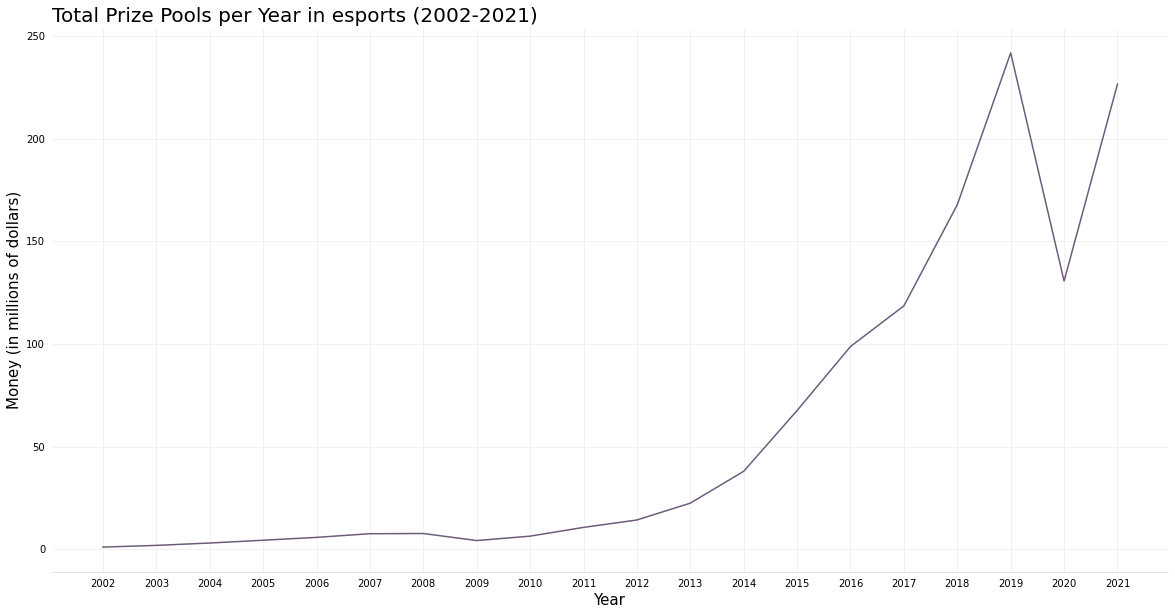

In [228]:
total_year = prizes_df.sum()/1e6

x = np.array(prizes_df.columns)
x = np.delete(x, -1)
y = np.array(total_year)
y = np.delete(y, -1)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.plot(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True,  color='#EEEEEE')
ax.set_ylabel("Money (in millions of dollars)", fontsize=15)
ax.set_xlabel("Year", fontsize=15)
ax.set_title("Total Prize Pools per Year in esports (2002-2021)", fontsize=20, loc="left")

plt.show()

It is clear that the esports scene has seen a sizeable growth since 2002, with most of it starting after 2012. There is one major exception and this occur in the year 2020, where we see a suddent drop in the prize pool. It can be theorized that this is a direct result of the COVID-19 pandemic being most prominent during that year, affecting the economic stability of the sports genre.

In a similar manner, there is a small dip during the year 2009, probably as a result of the 2008-2009 economic recession. 

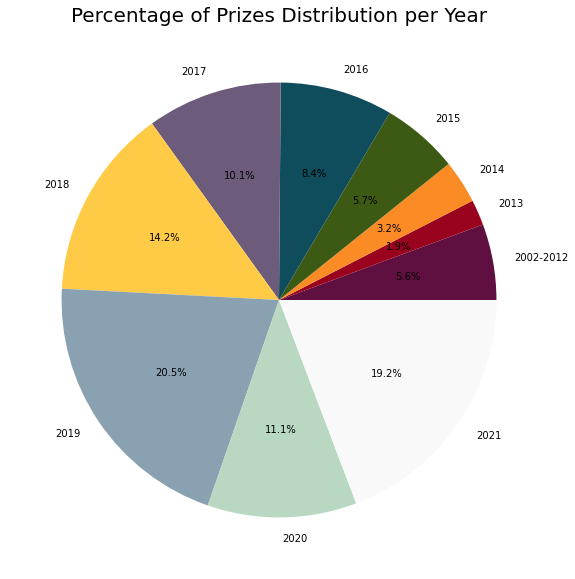

In [229]:
label_years = ["2002-2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
y = np.array(total_year)
y = np.delete(y, -1)
i=0
while i<len(y):
    if(i==0):
        small_sum = y[0]
    elif(i<11 and i!=0):
        small_sum += y[i]
    i+=1
new_y=[]
new_y.append(small_sum)
for num in range(20):
    if(num<11):
        continue
    else:
        new_y.append(y[num])
colors = ["#5F0F40",  "#9A031E", "#FB8B24", "#3C5A14", "#0F4C5C", barColor, "#FFCB47", "#8AA1B1", "#B9D8C2", "#F9F9F9"]
fig, ax5 = plt.subplots()
plt.pie(new_y, labels=label_years, autopct='%1.1f%%', colors=colors)
ax5.set_title("Percentage of Prizes Distribution per Year", fontsize=20)
fig.set_facecolor("white")


fig.set_size_inches(10, 10)

The graph above shows us the percentage distribution of the total prize pools per year during the 20 years period. The period from 2002 to 2012 only equate to 5.6% of the total pool. On the contrary, 2019 contributes to 20.5% (the largest percentage) of the total pool with a over a 6% increase over 2018 and 9% over 2020.

### Largest Prize Pool Games  <a id="section2"></a>
*** 
This following graph shows the top 10 largest games (in terms of earnings) over the last 20 years in the esports industry.  

 It is important to note that these only display the prize pools offered by these companies in Esports and might not necesarily reflect the revenues of the companies from their regular player base nor from the tournaments. 

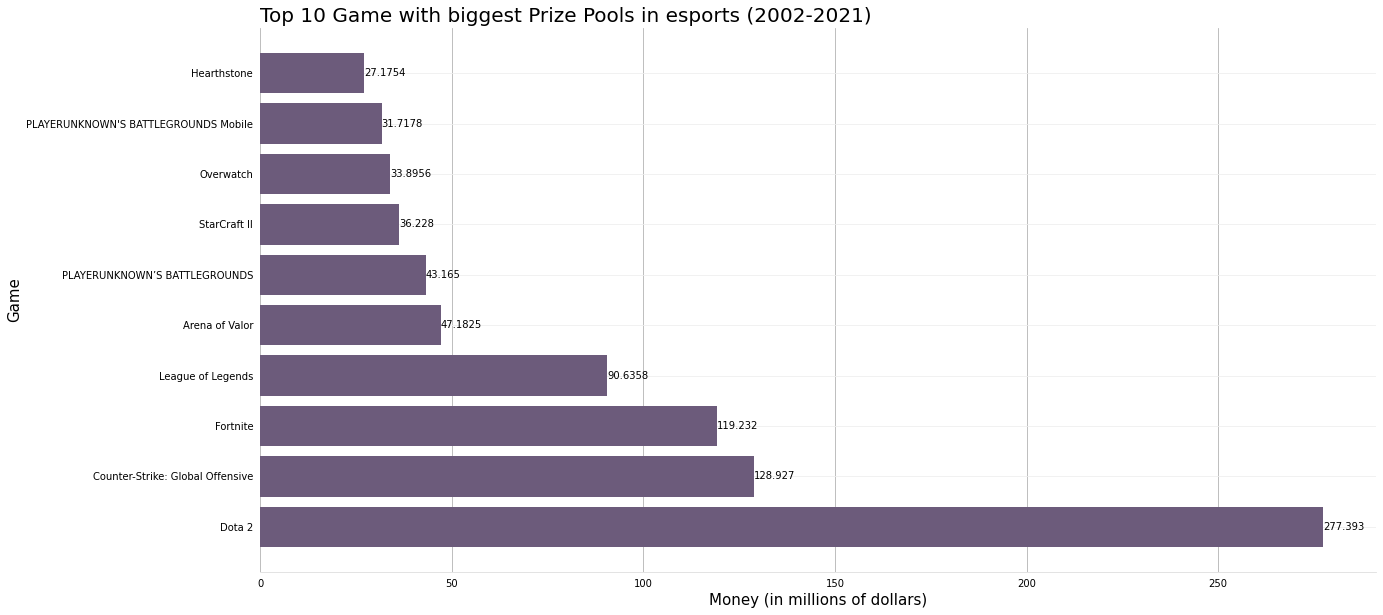

In [230]:
prizes_df = prizes_df.sort_values(by="totalPool", ascending=False)
x = np.array(prizes_df.head(10).index)
y = np.array(prizes_df.head(10)["totalPool"]/1e6)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.barh(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True)
ax.bar_label(plot)
ax.set_xlabel("Money (in millions of dollars)", fontsize=15)
ax.set_ylabel("Game", fontsize=15)
ax.set_title("Top 10 Game with biggest Prize Pools in esports (2002-2021)", fontsize=20, loc="left")

plt.show()

As it can be seen, <font color = #6C5B7B> _Dota 2_ </font> shows a marginal advantage in Prize Pool Money over the rest of the Top 10 (around 150 million dollars). This difference is not presented again in such proportion until the droupout between<font color = #6C5B7B> _League of Legends_ </font> and <font color = #6C5B7B> _Arena of Valor_ </font>, with a difference of around 43 million dollars. 

The boxplot shown below allows for a statistical representation of this behavior for both, the Top 10 as well as the dataset as a whole.

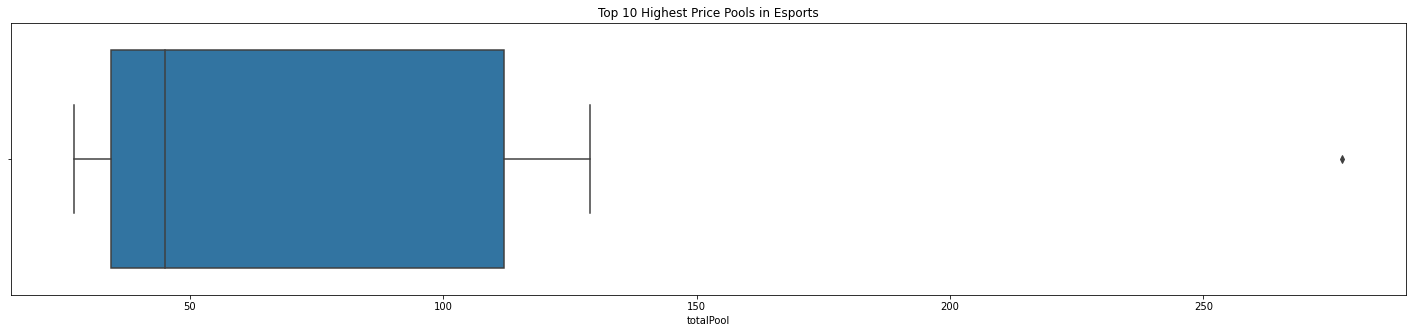

In [231]:
ax_hist = sns.boxplot(x= prizes_df["totalPool"].head(10)/1e6)
ax_hist.set_title("Top 10 Highest Price Pools in Esports")
fig = plt.gcf()
fig.set_size_inches(25, 5)

It is easy to notice that the data presented above is skewed since 50% of our values are found around 25 and 125 million dollars and our median is present around the 40 million mark, which marks the point where the data is divided between the lower and upper. 

However, to show this distribution for all esports games is not possible with a boxplot, as the graph is incomprehensible (as seen below). 

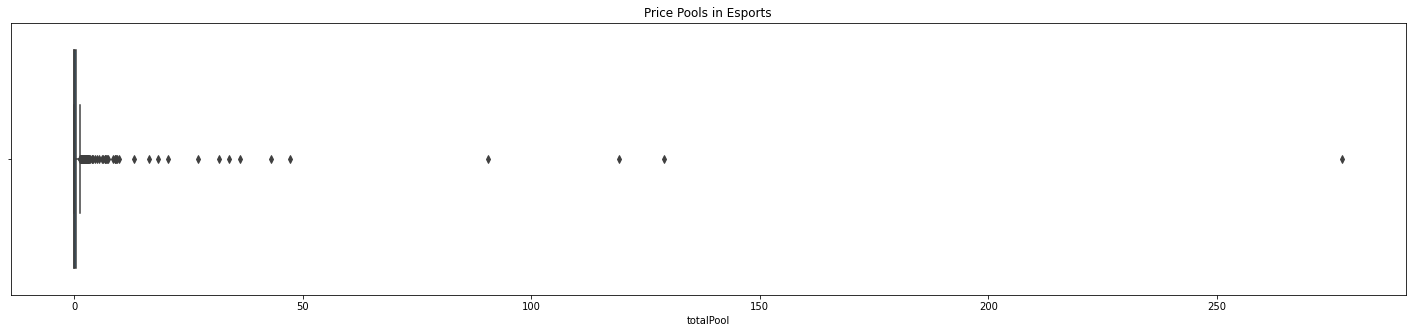

In [232]:
ax_hist_2 = sns.boxplot(x= prizes_df["totalPool"]/1e6)
ax_hist_2.set_title("Price Pools in Esports")
fig = plt.gcf()
fig.set_size_inches(25, 5)

To fix this, we can instead refer to a histogram plot. 

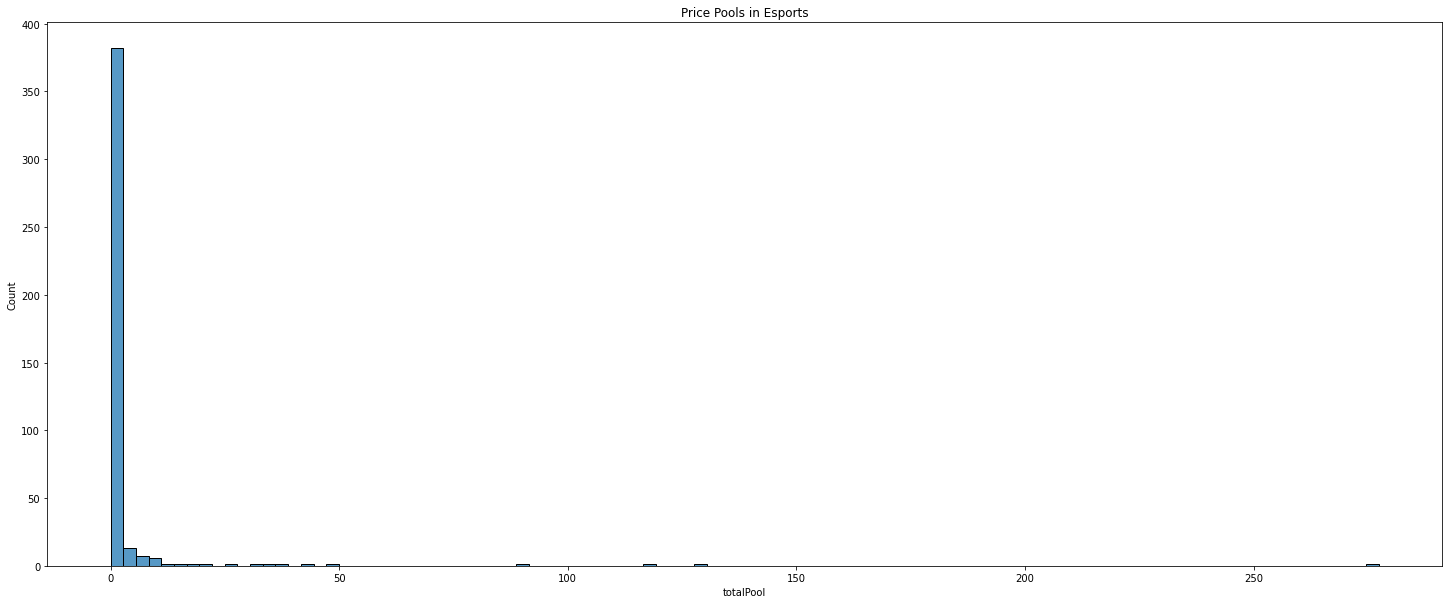

In [233]:
ax_hist_3 = sns.histplot(x= prizes_df["totalPool"]/1e6, bins=100)
ax_hist_3.set_title("Price Pools in Esports")
fig = plt.gcf()
fig.set_size_inches(25, 10)

This shows us that despite there being over 400 games in the esports scene, most of the prize pool's weight falls over the Top 10. 

The graph below displays this in more detail. 

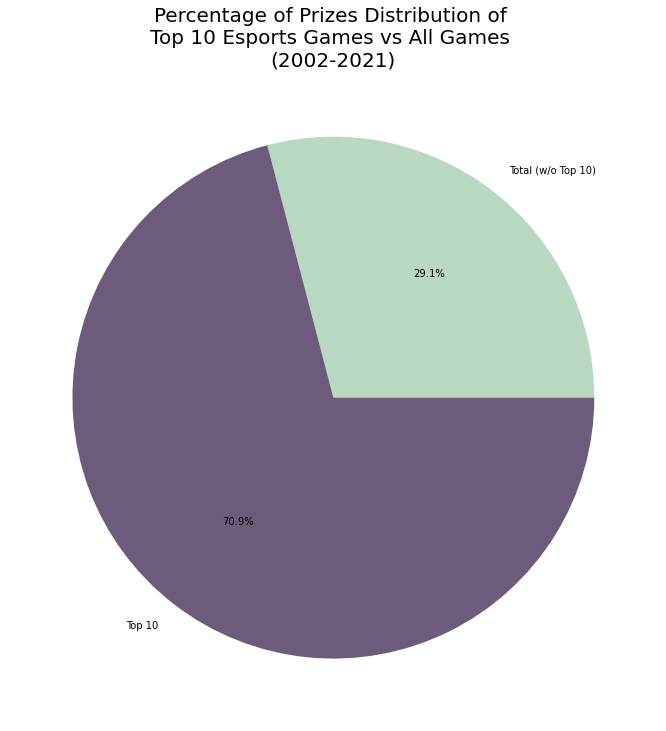

In [234]:
total_list = prizes_df.head(10)["totalPool"]
top_10_sum = sum(total_list)
total = prizes_df["totalPool"].sum()
total_rest = [total - top_10_sum, top_10_sum]
label_ratio_top_10 = ["Total (w/o Top 10)", "Top 10"]
colors = ["#B9D8C2", barColor]
fig, ax_ratio = plt.subplots()
plt.pie(total_rest, labels=label_ratio_top_10, autopct='%1.1f%%', colors=colors)
ax_ratio.set_title("Percentage of Prizes Distribution of \nTop 10 Esports Games vs All Games \n(2002-2021)", fontsize=20)
fig.set_facecolor("white")


fig.set_size_inches(12, 12)


Out of the total prize pool generated from 2002 to 2021, 70.9% corresponds to the Top 10 games in the esports scene (those which were described above). This is proof that our prize pools are indeed concentrated over only a portion of the games rather than equally distributed. 

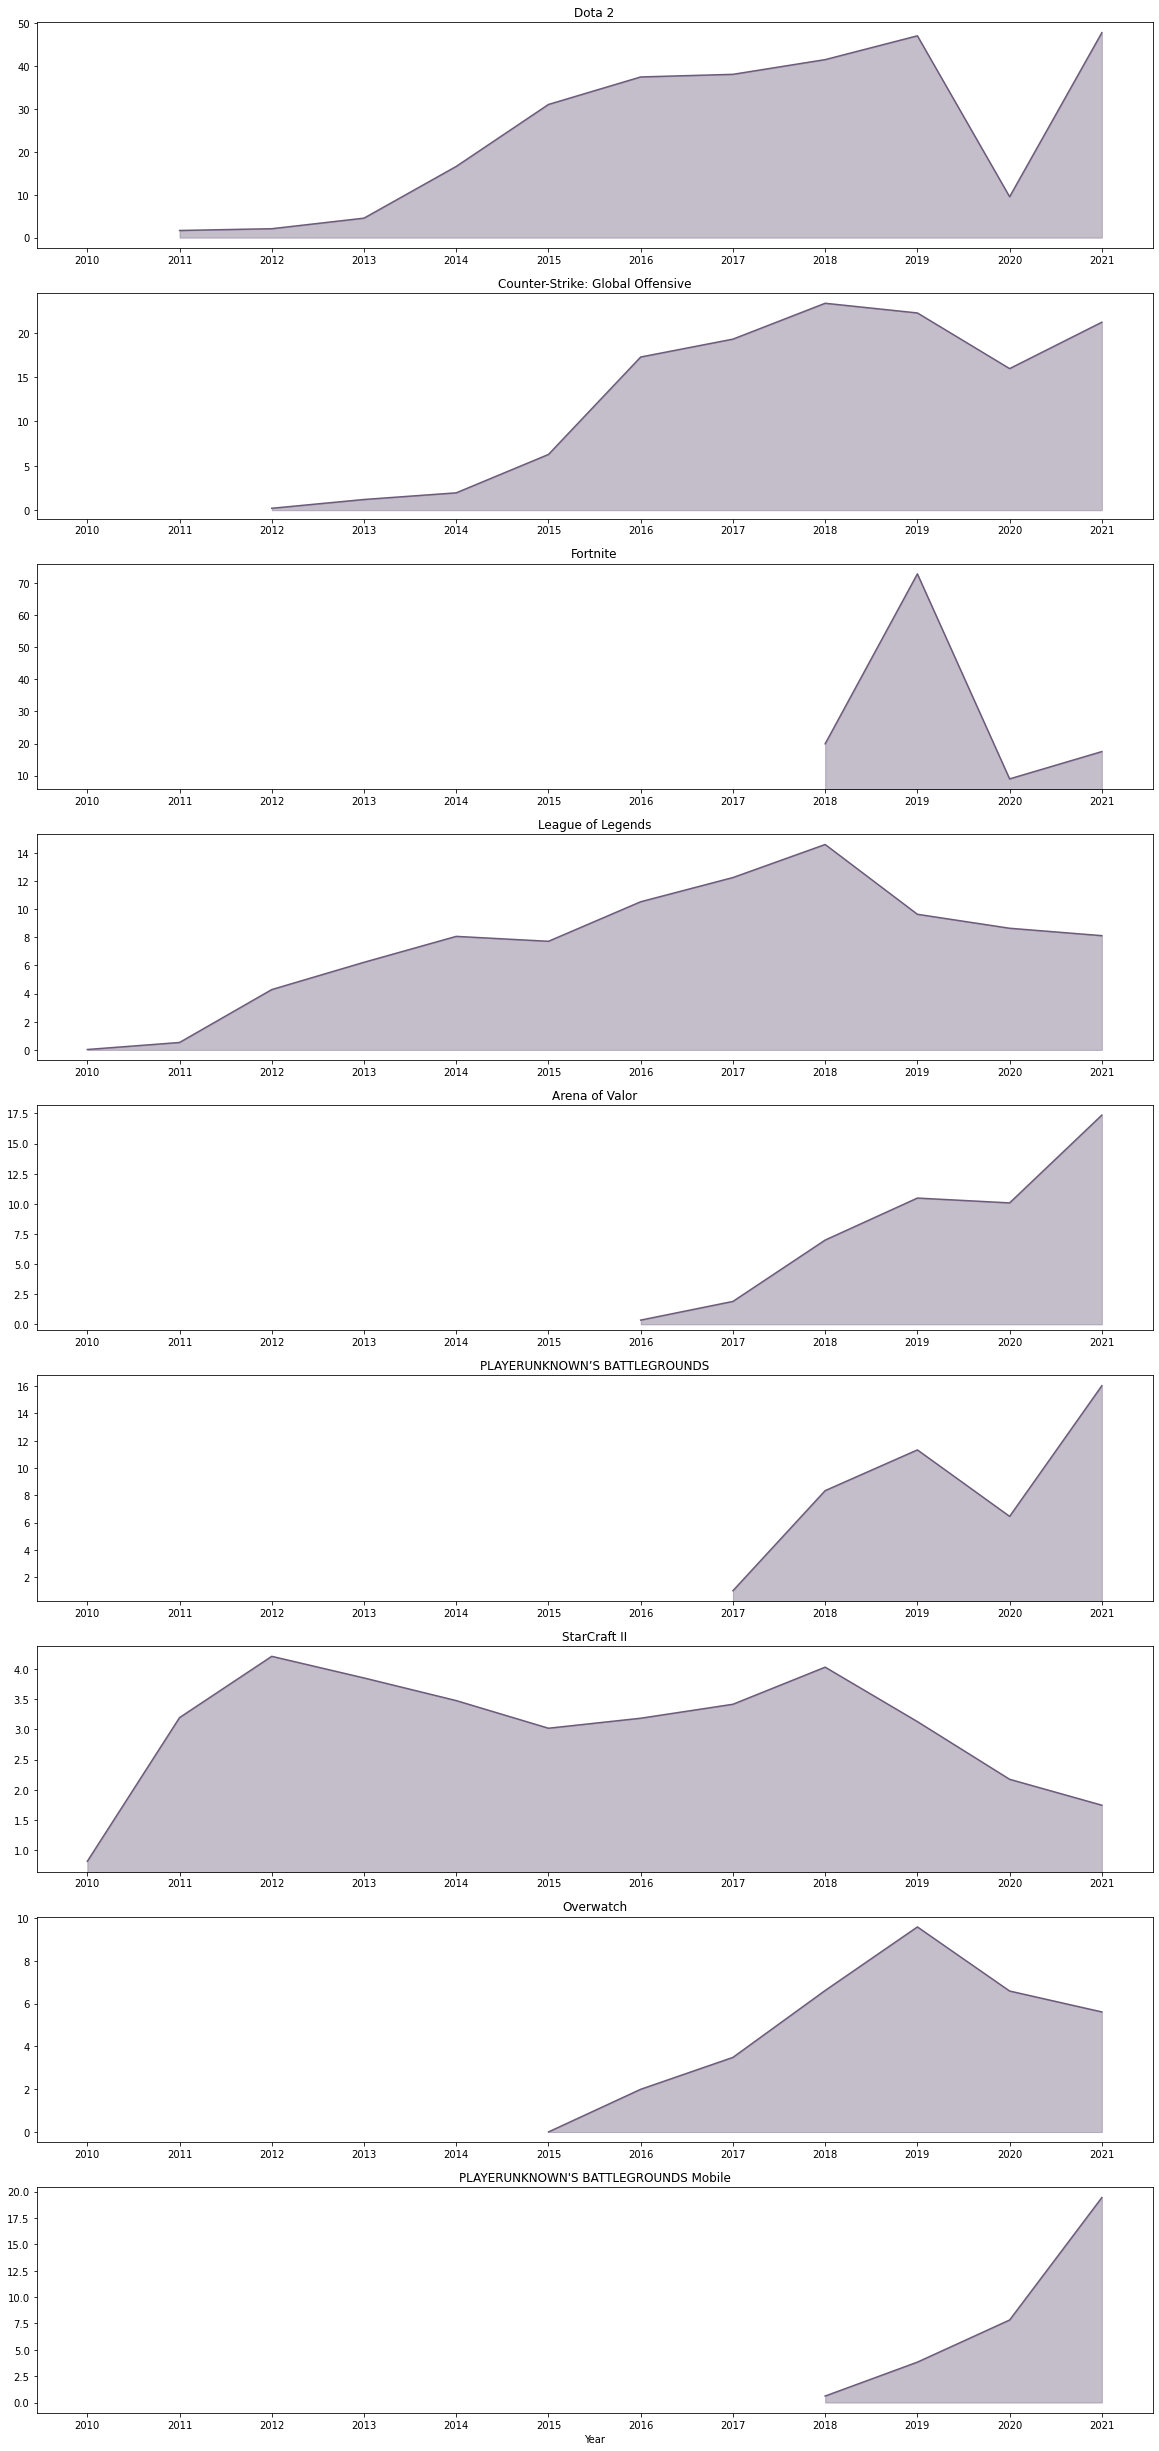

In [235]:
x = np.array(prizes_df.drop(columns=["totalPool"]).columns)
y = np.array(prizes_df.drop(columns=["totalPool"]).head(10)/1e6)

g1 = plt.subplot(9, 1, 1)
plt.plot(x, y[0], label=prizes_df.index[0], color=barColor)
plt.rcParams["figure.figsize"] = (20,40)
plt.title(prizes_df.index[0])
plt.fill_between(x, y[0], color=barColor, alpha=0.4)
i=1
while i<9:
    plt.subplot(9,1,i+1, sharex=g1)
    plt.plot(x, y[i], color=barColor)
    plt.title(prizes_df.index[i])
    plt.fill_between(x, y[i], color=barColor, alpha=0.4)
    i+=1
plt.xlabel("Year")
plt.subplots_adjust(bottom = 0.05)
plt.show()

When we compare the graphs shown above there are a couple of things worth mentioning:
>1. All of the top 10 games either were released in/after 2010 or joined the esports scene during/after that year. 
>2. For most of them, the growth has been volatile, with an usual increase after the 1-2 years mark. 
>3. The year 2020 sees either a considerable drop in prize pool or little to now increase in it. 
>4. Games like _Fortnite_ and _PUBG_ (including _PUBG Mobile_) have managed to form part of the top 10 in the esports scene despite joining very recently when compared to the others in that list. 

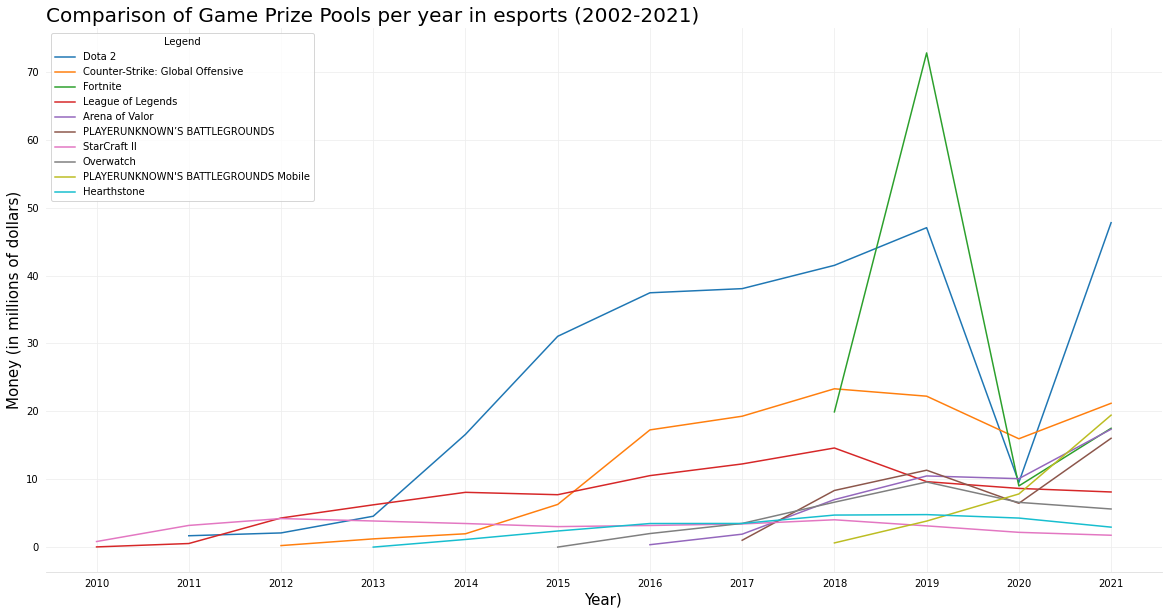

In [236]:
x = np.array(prizes_df.drop(columns=["totalPool"]).columns)
y = np.array(prizes_df.drop(columns=["totalPool"]).head(10)/1e6)
fig, ax2 = plt.subplots()
fig.set_size_inches(20, 10)

for g in range(10):
    ax2.plot(x, y[g], label=prizes_df.index[g])
ax2.legend(title='Legend')


ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, left=False)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(True, color='#EEEEEE')
ax2.set_xlabel("Year)", fontsize=15)
ax2.set_ylabel("Money (in millions of dollars)", fontsize=15)
ax2.set_title("Comparison of Game Prize Pools per year in esports (2002-2021)", fontsize=20, loc="left")

plt.show()

When we compare all of the Top 10 esports prize pools we see the obvious difference _Dota 2_ has over the other 9 for most of its years in the scene. However, during 2019 we see that _Fortnite_ went past its competitor by a substantial amount. 

Again, we see the same behavior explained before in the year 2020. 

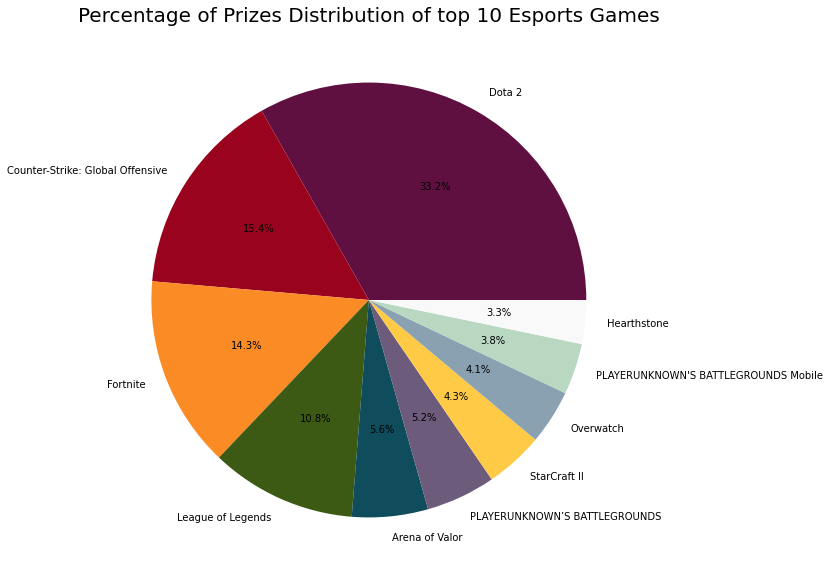

In [237]:
total = prizes_df["totalPool"].sum()
total_list = prizes_df.head(10)["totalPool"]
top_10 = prizes_df.head(10).index
colors = ["#5F0F40",  "#9A031E", "#FB8B24", "#3C5A14", "#0F4C5C", barColor, "#FFCB47", "#8AA1B1", "#B9D8C2", "#F9F9F9"]
fig, ax4 = plt.subplots()
plt.pie(total_list, labels=top_10, autopct='%1.1f%%', colors=colors)
ax4.set_title("Percentage of Prizes Distribution of top 10 Esports Games", fontsize=20)
fig.set_facecolor("white")


fig.set_size_inches(10, 10)


This pie chart allows us to consider the scenario described above through a different perspective. From the total prize pool among the top 10 games, we can see that _Dota 2_ equates to 33.2% of the distribution which is over two times that of _CSGO_ and _Fortnite_, the following competitor. 

### Tournaments per Year in Esports
***
We can move on to analyze the tournaments per year. From now on we will be referring to the tour_df dataframe created [above](#dfsection)

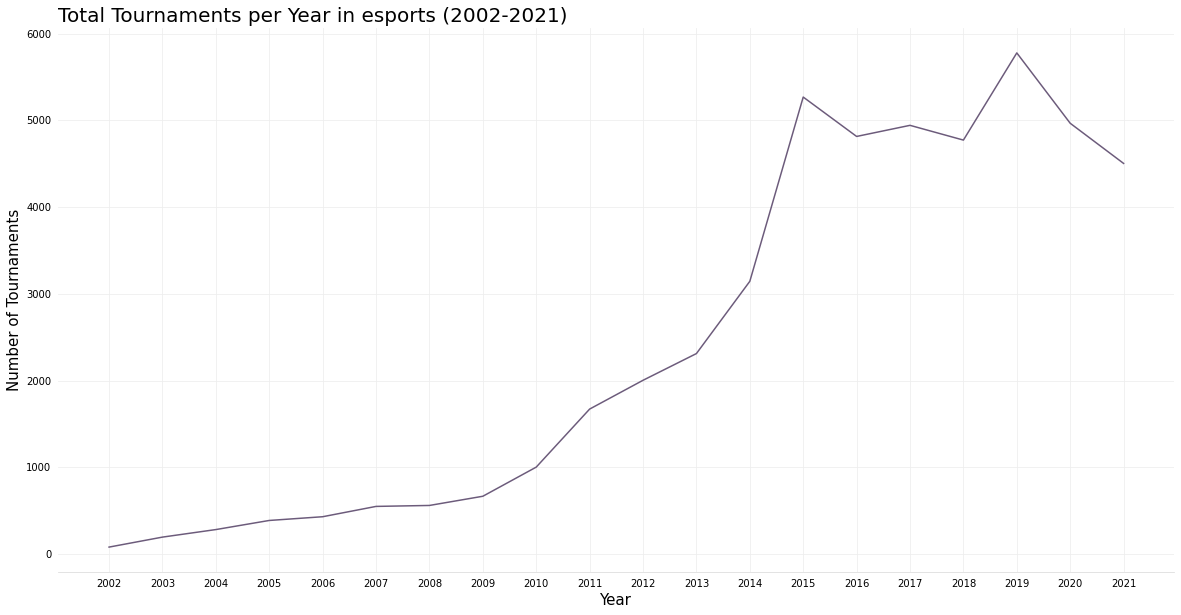

In [238]:
tour_year = tour_df.sum()

x = np.array(tour_df.columns)
x = np.delete(x, -1)
y = np.array(tour_year)
y = np.delete(y, -1)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.plot(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True,  color='#EEEEEE')
ax.set_ylabel("Number of Tournaments", fontsize=15)
ax.set_xlabel("Year", fontsize=15)
ax.set_title("Total Tournaments per Year in esports (2002-2021)", fontsize=20, loc="left")

plt.show()

It is interesting to see that despite both of them having a similar growth, this graph does not behave in the same way as the ["Prize Pools Per Year" graph](#section1). This is best seen during the period from 2016 to 2018 were we see a decrease in tournaments which does not occur in prize pools. 

Additionally, although we do see that 2019 still pocesses the highest peak for both graphs, 2020 does not decrease in the same scale as the total prize pool does for that specific year. This might be due to the inherent advantage of esports over other sports, which allows for tournaments to be held online. This is particularly beneficial amidst a pandemic such as COVID-19 which was discussed before. 

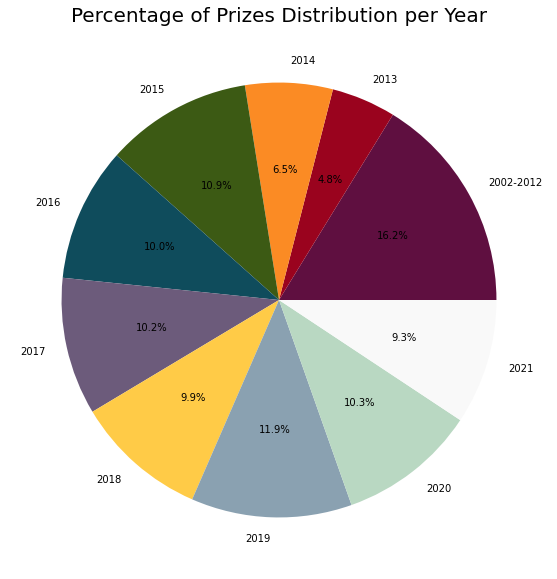

In [239]:
label_years = ["2002-2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"]
y = np.array(tour_year)
y = np.delete(y, -1)
i=0
while i<len(y):
    if(i==0):
        small_sum = y[0]
    elif(i<11 and i!=0):
        small_sum += y[i]
    i+=1
new_y=[]
new_y.append(small_sum)
for num in range(20):
    if(num<11):
        continue
    else:
        new_y.append(y[num])
colors = ["#5F0F40",  "#9A031E", "#FB8B24", "#3C5A14", "#0F4C5C", barColor, "#FFCB47", "#8AA1B1", "#B9D8C2", "#F9F9F9"]
fig, ax5 = plt.subplots()
plt.pie(new_y, labels=label_years, autopct='%1.1f%%', colors=colors)
ax5.set_title("Percentage of Prizes Distribution per Year", fontsize=20)
fig.set_facecolor("white")


fig.set_size_inches(10, 10)

The previous chart allows us to visualize the percentage distribution of tournaments during the 20 year period. It is interesting to see that the percentage of tournaments during the 2002-2012 period is a significantly larger than the prize pools during those corresponding years, solidifying the fact that during the early years of esports there were more tournaments but with smaller (if any) prize pools.

Additionally, the number of tournaments after 2015 seems to have arrived to a constant proportion. 

### Video Games with Most Tournaments
***
As with the previous analysis, let's focus on the top 10.

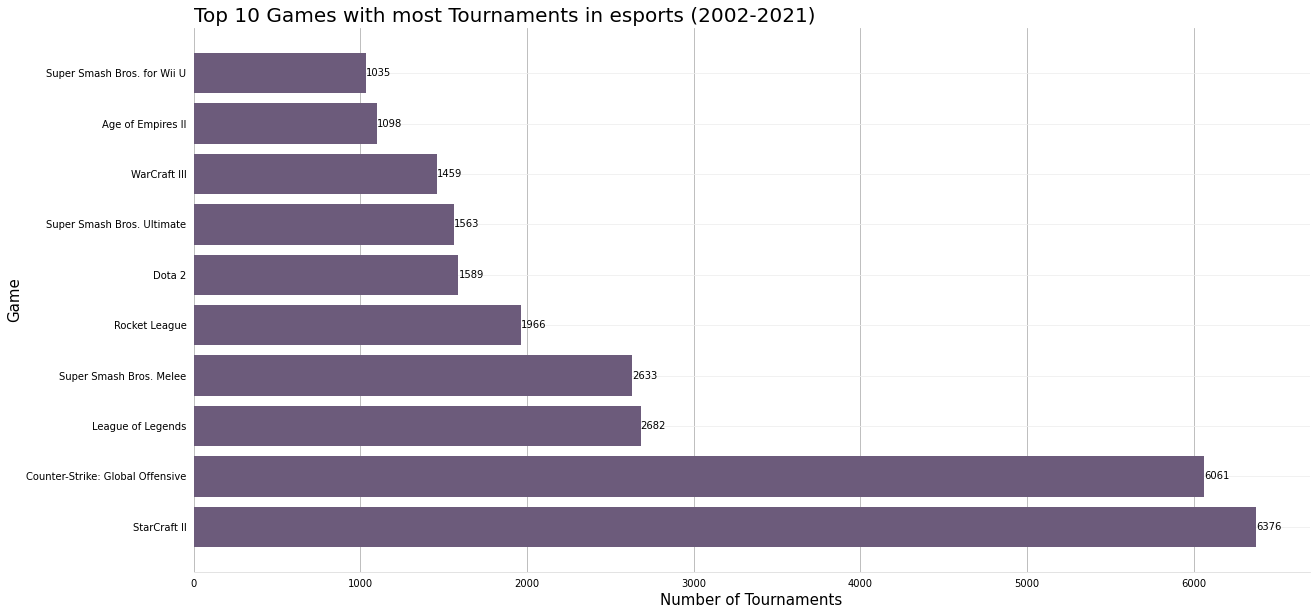

In [240]:
tour_df = tour_df.sort_values(by="totalTour", ascending=False)

top_10_tour = tour_df.head(10)
x=top_10_tour.index
y=top_10_tour["totalTour"]


fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.barh(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True)
ax.bar_label(plot)
ax.set_xlabel("Number of Tournaments", fontsize=15)
ax.set_ylabel("Game", fontsize=15)
ax.set_title("Top 10 Games with most Tournaments in esports (2002-2021)", fontsize=20, loc="left")

plt.show()

It is interesting to see that our top 10 tournament organizers are not the same as the top 10 prize pool holders. In fact, only 4 out of 10 of them remain holding this position (_CSGO, Dota 2 and League of Legends_, _Starcraft II_). Instead, we see the addition of 6 different games out of which 3 of them belong to the same franchise, _Super Smash Bros._ by Nintendo. 

Furthermore, _Starcraft II_ and _CSGO_ surpass their competition by over 2 times the number of tournaments. 

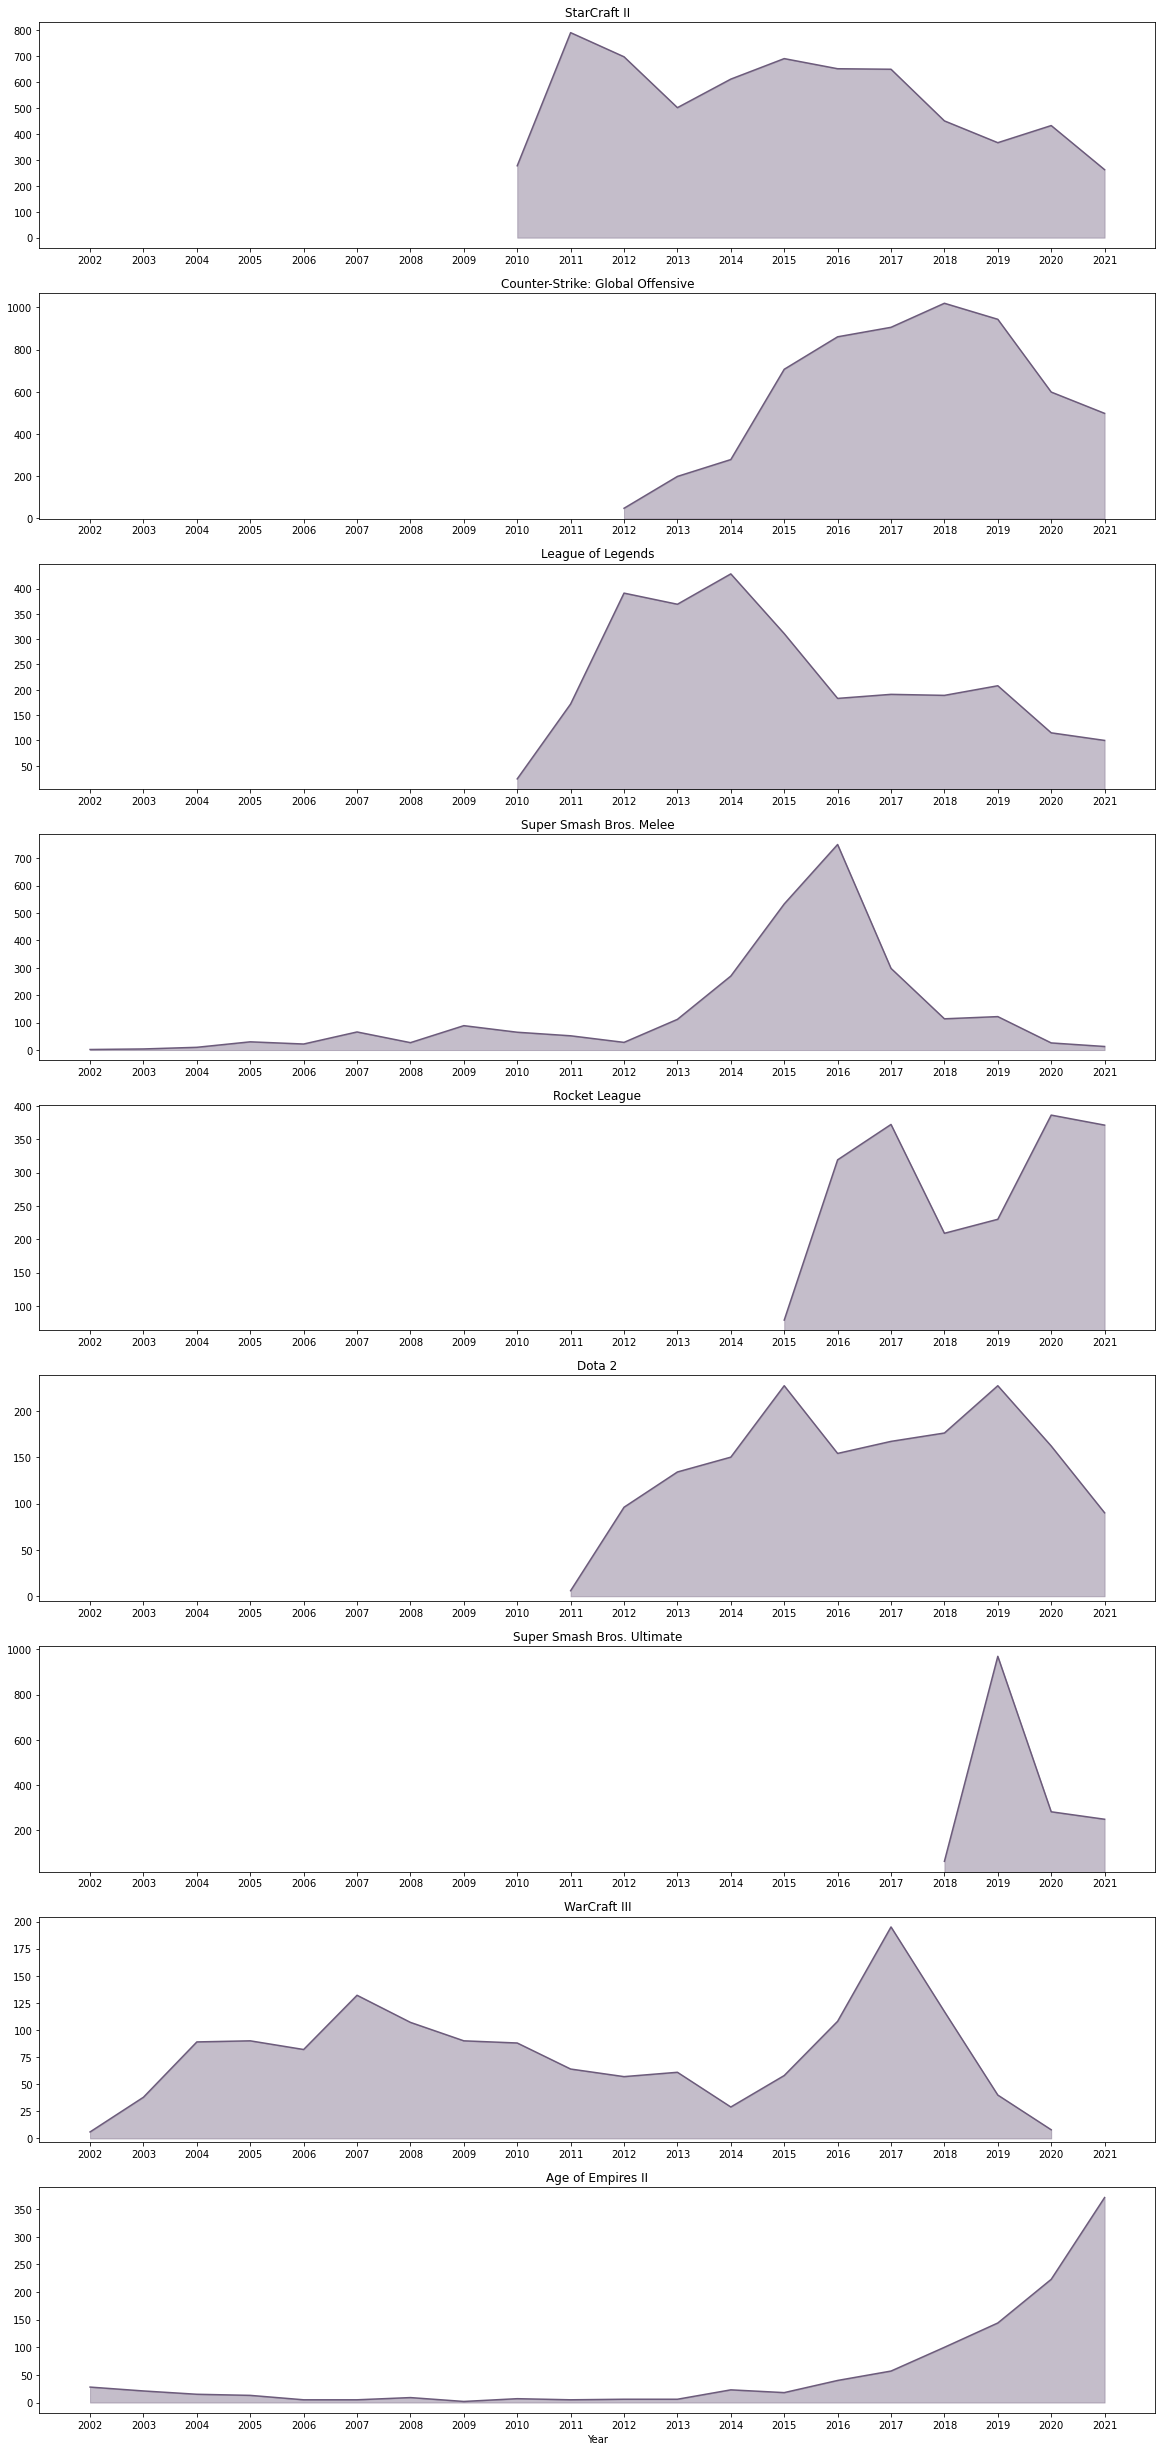

In [241]:
x = np.array(tour_df.drop(columns=["totalTour"]).columns)
y = np.array(tour_df.drop(columns=["totalTour"]).head(10))

g1 = plt.subplot(9, 1, 1)
plt.plot(x, y[0], label=prizes_df.index[0], color=barColor)
plt.rcParams["figure.figsize"] = (20,40)
plt.title(tour_df.index[0])
plt.fill_between(x, y[0], color=barColor, alpha=0.4)
i=1
while i<9:
    plt.subplot(9,1,i+1, sharex=g1)
    plt.plot(x, y[i], color=barColor)
    plt.title(tour_df.index[i])
    plt.fill_between(x, y[i], color=barColor, alpha=0.4)
    i+=1
plt.xlabel("Year")
plt.subplots_adjust(bottom = 0.05)
plt.show()

From this graph we can get a lot of insight on the behavior of these games.

It has already been discussed multiple times throughout this analysis the uncommonness of the year 2020 and that despite the effects on prize pools, it didn't always replicate in the number of tournaments.

> 1. For _Starcraft II_ the data begins in 2010 and the number of tournaments since then has fluctuated a lot. However, it seems that it is now heading towards an overall decreasing trend.
> 2. _CSGO_ had a significant increase in 2015 that decreased drastically in 2020 and did not recover in 2021. 
> 3. _League of Legends_ found a steady number in 2016, which remained until the 2020 downfall. 
> 4. _Super Smash Bros. Melee_ had kept numbers evenly since 2002, with a slight increase in 2007. However, in 2014 the game saw noteworthy increase in its numbers, peaking in 2016 and decreasing considerably in its subsequent years. 
> 5. _Rocket League's_ data shows a somewhat turbulent history in its numbers, specifically during the years 2018-2019. 
> 6. _Dota 2_ shows a similar behavior to that of _LoL_, with peaks in the years 2015 and 2019. 
> 7. The data for _Super Smash Bros. Ultimate_ is very recent and not a lot of insight can be taken from it. Nonetheless, it is important to note that despite its recent appearance, it managed to find its way to the top 10. This is perhaps due to the success of its predecessors.
> 8. The history of _Warcraft III_ remained steady for a considerable amount of time, with a peak in 2017 that decreased substantially until 2021, where it saw no tournaments. 
> 9. Finally, _Age of Empires_ shows that its tournaments remained on the lower end for most of its years until 2015, where it started seeing increasing numbers. 


### Tournaments vs. Prize Pool
***
Let's create a comparison between the number of tournaments and their prize pools.

In [259]:
#The data was organized per total prizes and tournaments which means they have different orders for each df. Therefore we recreate each df from 
# original df under different names. 
prizes_df_2 = df.pivot(index="Game", columns="Year", values="Prize")
tour_df_2 = df.pivot(index="Game", columns="Year", values="NumTournaments")
prizes_df_2["totalPool"]=prizes_df_2.sum(axis=1, numeric_only=True, skipna=True)
remove_list = prizes_df_2[prizes_df_2['totalPool'] < 1000.00].index
prizes_df_2 = prizes_df_2.drop(remove_list)
tour_df_2 = tour_df_2.drop(remove_list)
tour_df_2["totalTour"]=tour_df_2.sum(axis=1, numeric_only=True, skipna=True)

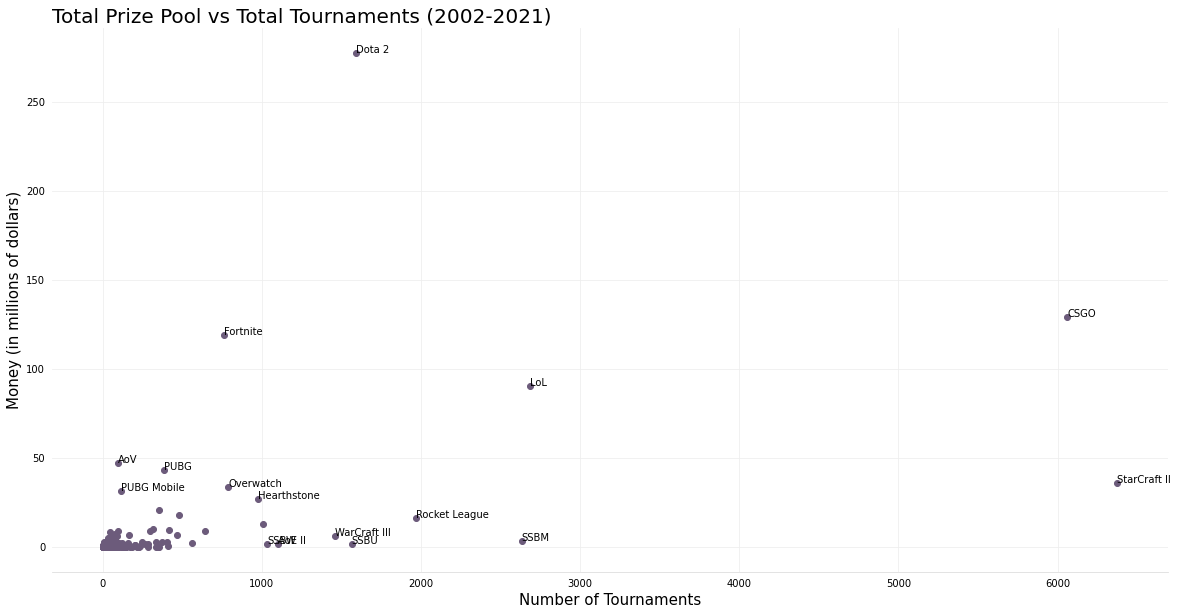

In [248]:
x = np.array(tour_df_2["totalTour"])
y = np.array(prizes_df_2["totalPool"]/1e6)

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.scatter(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True,  color='#EEEEEE')
ax.set_ylabel("Money (in millions of dollars)", fontsize=15)
ax.set_xlabel("Number of Tournaments", fontsize=15)
ax.set_title("Total Prize Pool vs Total Tournaments (2002-2021)", fontsize=20, loc="left")

# Get the top 10 of both, tournaments and prize pools from previous analysis.
top_10_prizes = prizes_df.head(10).index
top_10_tour = tour_df.head(10).index
labels=[]
for elem in top_10_tour:
        labels.append(elem)
for elem in top_10_prizes:
    labels.append(elem)

for i in range(len(prizes_df_2.index)):
    if prizes_df_2.index[i] in labels:
        # Formatting names for visualization
        elem = prizes_df_2.index[i]
        if(str(elem) == "PLAYERUNKNOWN’S BATTLEGROUNDS"):
                ax.annotate("PUBG", (x[i], y[i]))
        elif(elem == "PLAYERUNKNOWN'S BATTLEGROUNDS Mobile"):
                ax.annotate("PUBG Mobile", (x[i], y[i]))
        elif(elem == "Counter-Strike: Global Offensive"):
            ax.annotate("CSGO", (x[i], y[i]))
        elif(elem == "League of Legends"):
            ax.annotate("LoL", (x[i], y[i]))
        elif(elem == "Super Smash Bros. Melee"):
            ax.annotate("SSBM", (x[i], y[i]))
        elif(elem == "Super Smash Bros. Ultimate"):
            ax.annotate("SSBU", (x[i], y[i]))
        elif(elem == "Super Smash Bros. for Wii U"):
            ax.annotate("SSBW", (x[i], y[i]))
        elif(elem == "Age of Empires II"):
            ax.annotate("AoE II", (x[i], y[i]))
        elif(elem == "Arena of Valor"):
            ax.annotate("AoV", (x[i], y[i]))
        else:
            ax.annotate(elem, (x[i], y[i]))

plt.show()


From this we can visualize in a clearer manner the Number of Tournaments versus the prize pool. 

As stated before, most of the games fall in the lower end of the graph, condensed between low prize pool and tournaments. 

Now, there is a question that is expected to arise from this. What games have the higher average prize pool tournament ratio? In other words, if we divide the prize pools for each year and divided it over the number of tournaments for each year per game and added all of those years, which games would be the top 10? 

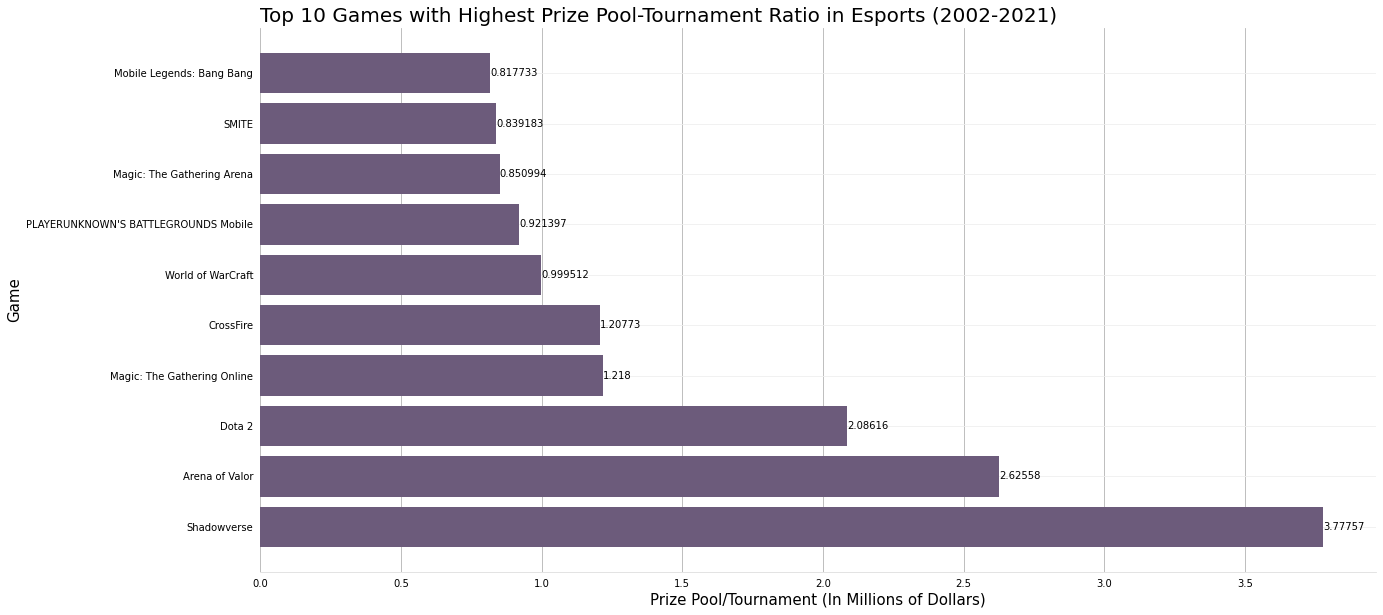

In [279]:
prize_tour_df = prizes_df_2.drop(columns="totalPool")/tour_df_2.drop(columns="totalTour")
prize_tour_df["totalPrize/Tour"]=prize_tour_df.sum(axis=1, skipna=True)
prize_tour_df = prize_tour_df.sort_values(by="totalPrize/Tour", ascending=False)

x = prize_tour_df.head(10).index
y = prize_tour_df.head(10)["totalPrize/Tour"]/1e6

fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
barColor = "#6C5B7B"
plot = ax.barh(x, y, color = barColor)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True)
ax.bar_label(plot)
ax.set_xlabel("Prize Pool/Tournament (In Millions of Dollars)", fontsize=15)
ax.set_ylabel("Game", fontsize=15)
ax.set_title("Top 10 Games with Highest Prize Pool-Tournament Ratio in Esports (2002-2021)", fontsize=20, loc="left")

plt.show()

Text(0.0, 1.0, 'Comparison of Game Prize Pools per year in esports (2002-2021)')

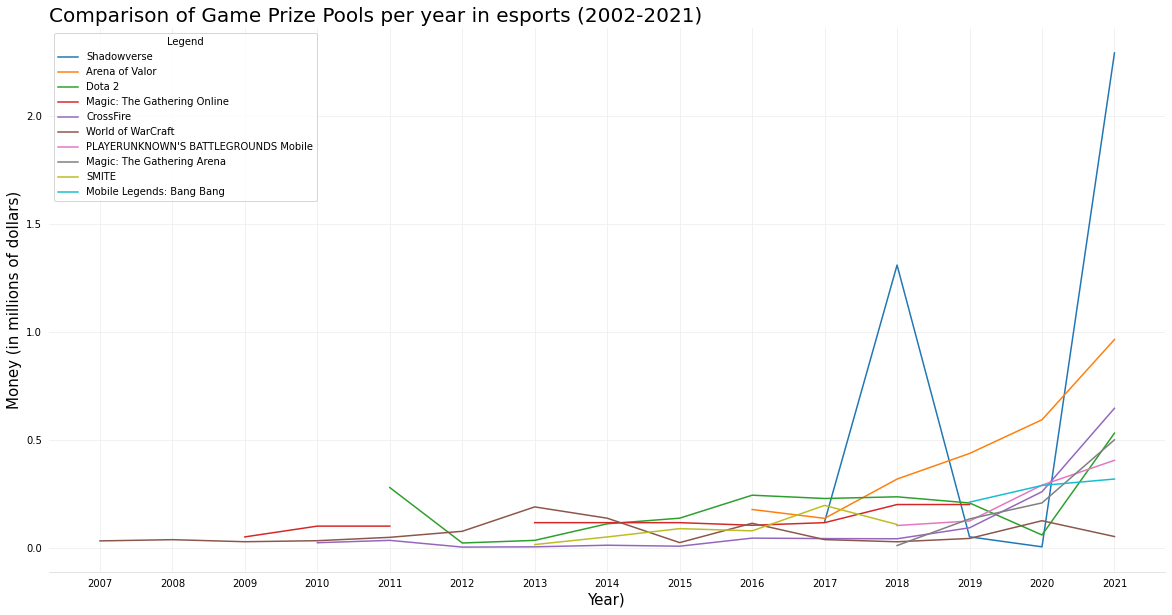

In [296]:
fig, ax2 = plt.subplots()
fig.set_size_inches(20, 10)

x = np.array(prize_tour_df.drop(columns=["totalPrize/Tour"]).head(10).columns)
y = np.array(prize_tour_df.drop(columns=["totalPrize/Tour"]).head(10)/1e6)

for elem in range(10):
    ax2.plot(x, y[elem], label=prize_tour_df.index[elem])
ax2.legend(title='Legend')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, left=False)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(True, color='#EEEEEE')
ax2.set_xlabel("Year)", fontsize=15)
ax2.set_ylabel("Money (in millions of dollars)", fontsize=15)
ax2.set_title("Comparison of Game Prize Pools per year in esports (2002-2021)", fontsize=20, loc="left")